<a href="https://colab.research.google.com/github/kiryu-3/prosa/blob/main/Python/Python_Stats/Stats_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第6章 母比率と母分散の区間推定

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install japanize-matplotlib
import japanize_matplotlib
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from scipy.stats import chi2
from decimal import Decimal, ROUND_HALF_UP, ROUND_HALF_EVEN

## 比率とは？
**比率**(ratio)とは、内閣支持率や工場で発生した不良品の割合など、  
総数に対して個々のカテゴリが占める割合のことを指します。

この比率の推定は、応用されている例は結構あります。  
例えば選挙速報は、開票率1%で当選確実かどうかを判断しています。  
これは母集団の比率を標本から推定しているためです。  



## 母比率の区間推定

### 区間推定のステップ（再掲）
①母集団から無作為抽出して標本を作成  
②標本から**推定量**を計算  
③**信頼区間**を設けて母数を推定  
④推定量の標本分布（標本統計量が従う分布）を考える  
⑤信頼区間がとりうる値を標本分布から算出する

### 母集団から無作為抽出して標本を作成
母集団の比率を$p$とし、標本の大きさを$n$とします。

イメージを付けやすくするために、具体例も平行して進めます。

今回は知名度について取り上げます。  
2020年にとある番組で年代別に2000人を対象として日本人の知名度を集計する企画が放送されました。

今回はこの2000人の集計結果を元に標本を作ります。  
$n=2000$となります。

### 標本から推定量を計算
今回は標本比率が推定量となります。これを$\hat{p}$とします。  

今回の集計では大谷翔平選手の知名度が66.2%であったので、これを標本比率とします。  
$\hat{p}=0.662$となります。

### 信頼区間を設けて母数を推定
信頼区間は95%とすることが多いです。

### 推定量の標本分布を考える ※最重要
標本比率の標本分布について考えてみましょう。  
**ここが最重要です。**

#### 二項分布の場合（復習）
1回の事象が起こる確率を$p$とします。  
この試行を$n$回行った後に、ある事象が起こる回数（$x$とします）が従う確率分布を**二項分布**といいます。  

$平均μ=np$  
$標準偏差σ=\sqrt{np(1-p)} $

また二項分布には、**$n$が大きいときには正規分布に近似できる**という性質があります。  
その正規分布の平均は$np$、分散は$np(1-p)$になります。

#### 標本比率の場合
集計を例とします。 

「知っている」と答える人の割合を $p$(不明) とします。  
この試行を $n(=2000)$ 回行った後に、「知っている」と答えた人数（$x$とします）が従う確率分布は？  
($x=2000×0.662=1324$ となります）

#### 比率と二項分布
以上のように言い換えてみると、「知っている」と答えた人数$x$が従う確率分布は、  
二項分布に従うことが分かります。

$平均μ=np$  
$標準偏差σ=\sqrt{np(1-p)} $

よって比率 $\hat{p} (=\frac{x}{n})$が従う確率分布は二項分布に従うことが明らかになりました。  
また、$n$が大きいときには正規分布で近似することができます。

$平均μ=p$  
$標準偏差σ=\sqrt{\frac{p(1-p)}{n}}$

#### 標準化
標本分布の平均と標準偏差が分かったところで、**標準化**して分かりやすくしましょう。  
標準化の式は以下の通りです。

$$
z=\frac{\hat{p}-p}{\sqrt{\frac{p(1-p)}{n}}}
$$

### 信頼区間がとりうる値を標本分布から算出する
あとは$p$に対して計算して値を出していくだけです。

$$
\hat{p}-z×\sqrt{\frac{p(1-p)}{n}} ≦ p ≦ \hat{p}+z×\sqrt{\frac{p(1-p)}{n}}
$$

このままでは母比率$p$が信頼区間に含まれたままなので、$p$の不偏推定量である$\hat{p}$を使います。  
$\sqrt{\frac{p(1-p)}{n}}$の$p$を$\hat{p}$に置き換えます。

$$
\hat{p}-z×\sqrt{\frac{\hat{p}(1-\hat{p})}{n}} ≦ p ≦ \hat{p}+z×\sqrt{\frac{\hat{p}(1-\hat{p})}{n}}
$$

### Pythonによる区間推定

実際に手計算で解くのは結構手間なので、大谷翔平選手の知名度についてPythonで簡単に区間推定しましょう。

In [ ]:
alpha = 0.95
print("信頼係数：{}".format(alpha))

n = 2000
print("標本の大きさ：{}".format(n))

p = 0.662
print("標本の比率：{}".format(p))

信頼係数：0.95
標本の大きさ：2000
標本の比率：0.662


In [ ]:
# Pythonによる導出方法
x1,x2 = stats.binom.interval(alpha, n, p)  # 下方信頼限界 , 上方信頼限界
x1 = Decimal(str(x1)).quantize(Decimal('0.01'),rounding=ROUND_HALF_UP)
x2 = Decimal(str(x2)).quantize(Decimal('0.01'), rounding=ROUND_HALF_UP)

print("大谷翔平選手の知名度は信頼係数95%のもとで")
print("{} %≦ μ ≦ {}%".format(x1/n*100,x2/n*100))

大谷翔平選手の知名度は信頼係数95%のもとで
64.100 %≦ μ ≦ 68.2500%


### 演習
演習をして母比率パートは終了です。

まずは[こちら](https://bit.ly/3Vp36xp)の問題を区間推定してみましょう。

In [ ]:
alpha = 0.95
print("信頼係数：{}".format(alpha))

n = 100
print("標本の大きさ：{}".format(n))

p = 0.1
print("標本の比率：{}".format(p))

信頼係数：0.95
標本の大きさ：100
標本の比率：0.1


In [ ]:
# Pythonによる導出方法
x1,x2 = stats.binom.interval(alpha, n, p)  # 下方信頼限界 , 上方信頼限界

print("このテレビ番組の視聴率は信頼係数95%のもとで")
print("{} %≦ μ ≦ {}%".format(x1/n*100,x2/n*100))

このテレビ番組の視聴率は信頼係数95%のもとで
5.0 %≦ μ ≦ 16.0%


続いて[こちら](https://bit.ly/3veFMrl)の問題を区間推定してみましょう。

In [ ]:
alpha = 0.95
print("信頼係数：{}".format(alpha))

n = 400
print("標本の大きさ：{}".format(n))

p = 0.25
print("標本の比率：{}".format(p))

信頼係数：0.95
標本の大きさ：400
標本の比率：0.25


In [ ]:
# Pythonによる導出方法
x1,x2 = stats.binom.interval(alpha, n, p)  # 下方信頼限界 , 上方信頼限界

print("「おいしい」と評価する割合は信頼係数95%のもとで")
print("{} %≦ μ ≦ {}%".format(x1/n*100,x2/n*100))

「おいしい」と評価する割合は信頼係数95%のもとで
20.75 %≦ μ ≦ 29.25%


最後に[こちら](https://bit.ly/3I5ElDc)の問題を区間推定してみましょう。

In [ ]:
alpha = 0.95
print("信頼係数：{}".format(alpha))

n = 400
print("標本の大きさ：{}".format(n))

p = 0.2
print("標本の比率：{}".format(p))

信頼係数：0.95
標本の大きさ：400
標本の比率：0.2


In [ ]:
# Pythonによる導出方法
x1,x2 = stats.binom.interval(alpha, n, p)  # 下方信頼限界 , 上方信頼限界

print("6の目が出る割合は信頼係数95%のもとで")
print("{} %≦ μ ≦ {}%".format(x1/n*100,x2/n*100))

6の目が出る割合は信頼係数95%のもとで
16.25 %≦ μ ≦ 24.0%


## 母分散の区間推定

母集団の分散は通常未知です。    
そのため**不偏分散**を推定量としていましたが、平均・比率と同様、区間推定をすることもできます。

### カイ二乗
標準化した変数の二乗値をいくつか足し合わせて変数が従う確率分布を  
**カイ二乗分布**（**$\chi^2$分布**）といいます。

$$
\chi^2 = \sum_{i=1}^{n} (\frac{X_i-μ}{σ})^2=\frac{(n-1)s^{'2}}{σ^2}
$$

t分布と同様、自由度$m$の値が変わると形が変わります。  

カイ二乗分布の確率密度関数は以下の通りです。

$$
f(χ^2) = \frac{1}{2^\frac{m}{2}Γ(\frac{m}{2})}(χ^2)^{\frac{m}{2}-1}e^{-\frac{χ^2}{2}}  （0≦\chi^2≦∞）
$$

#### Pythonによるカイ二乗分布
自由度が変化したときのカイ二乗分布の形の変化についてみてみましょう。

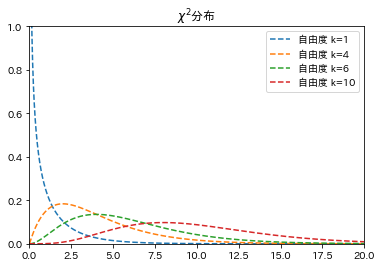

In [ ]:
x = np.linspace(0, 20, 10000)

# 自由度
k_deg = [1, 4, 6, 10]

# 自由度 n=1〜5 までのグラフを描画
for i in k_deg:
    plt.plot(x, chi2.pdf(x, i), linestyle='--',label='自由度 k={}'.format(i))

"""
****************************************
グラフの書式設定
****************************************
"""
plt.title("$χ^2$分布")   # タイトル
plt.xlim(0, 20)  # X軸範囲
plt.ylim(0, 1)  # Y軸範囲
plt.legend()  # 凡例
plt.show()

#### カイ二乗分布表

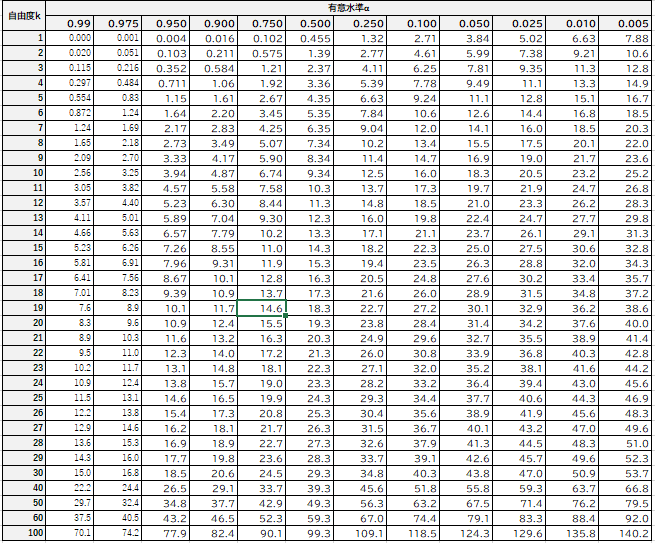

#### カイ二乗分布表の使い方
実際に手計算を行う際は、**カイ二乗分布表**を用いることで確率を求めます。

カイ二乗分布が以下のような図の場合、  
「自由度が$k$であり、青色部分の面積が$α$となるカイ二乗の値$\chi_α^2(k)$」を表します。

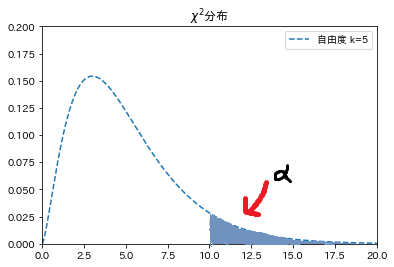

  （例：95%信頼係数に対応する自由度5のカイ二乗分布）

①自由度が「5」の行を見る。
  
②上方信頼限界を求める  
　$(1.00-0.95)/2=0.025$  
　$\chi^2_{0.025}(5)=12.8$ 

③下方信頼限界を求める  
　$1.00-0.025=0.975$  
　$\chi^2_{0.975}(5)=0.831$ 

### 区間推定のステップ（再掲）
①母集団から無作為抽出して標本を作成  
②標本から**推定量**を計算  
③**信頼区間**を設けて母数を推定  
④推定量の標本分布（標本統計量が従う分布）を考える  
⑤信頼区間がとりうる値を標本分布から算出する

### ① 母集団から無作為抽出して標本を作成
母集団の分散を$σ^2$とし、標本の大きさを$n$とします。

### ② 標本から推定量を計算
今回は**標本の不偏分散**が推定量となります。これを$s^{'2}$とします。  

### ③ 信頼区間を設けて母数を推定
信頼区間は95%とすることが多いです。

### ④ 推定量の標本分布を考える
不偏分散の標本分布は**カイ二乗分布**です。  
自由度$m$は $n-1$ となります。

$\chi_α^2(k)$を読み取り、$s^{'2}$の上方信頼限界と下方信頼限界を求めましょう。  
ここでは上方信頼限界を$\chi_U^2(k)$、下方信頼限界を$\chi_L^2(k)$とします。

$$
\chi_L^2(k) ≦ \frac{(n-1)s^{'2}}{σ^2} ≦ \chi_U^2(k)
$$

### ⑤ 信頼区間がとりうる値を標本分布から算出する
あとは$σ^2$に対して計算して値を出していくだけです。

$$
\frac{(n-1)s^{'2}}{\chi_U^2(k)} ≦ σ^2 ≦ \frac{(n-1)s^{'2}}{\chi_L^2(k)}
$$

### Pythonによる区間推定

[こちら](https://bit.ly/3I25ib8)の演習問題の区間推定を行ってみましょう。  

In [ ]:
# dictionaryからDataFrameを作る

data = {
    "都道府県":["兵庫県","大阪県","奈良県","岩手県","千葉県",
                "茨城県","福岡県","山梨県","滋賀県","鳥取県"],
    "全スクリーン数" : [126,224,34,25,199,89,178,14,38,11]
}

df = pd.DataFrame(data)
df

,都道府県,全スクリーン数
0,兵庫県,126
1,大阪県,224
2,奈良県,34
3,岩手県,25
4,千葉県,199
5,茨城県,89
6,福岡県,178
7,山梨県,14
8,滋賀県,38
9,鳥取県,11


In [ ]:
n = len(df)
print("標本の大きさ：{}".format(n))

s = stats.tvar(df["全スクリーン数"])
print("不偏分散：{}".format(s))

標本の大きさ：10
不偏分散：6757.288888888888


In [ ]:
x1,x2= stats.chi2.interval(alpha=0.95, df=n-1)  # 下側2.5%点,上側2.5%点
x1 = Decimal(str(x1)).quantize(Decimal('0.01'),rounding=ROUND_HALF_UP)
x2 = Decimal(str(x2)).quantize(Decimal('0.01'),rounding=ROUND_HALF_UP)

print("下側2.5%点は{}です".format(x1))
print("上側2.5%点は{}です".format(x2))

下側2.5%点は2.70です
上側2.5%点は19.02です


In [ ]:
up = (n-1)*s/float(x1)
bottom = (n-1)*s/float(x2)
up = Decimal(str(up)).quantize(Decimal('0.01'),rounding=ROUND_HALF_UP)
bottom = Decimal(str(bottom)).quantize(Decimal('0.01'),rounding=ROUND_HALF_UP)

print("{}≦σ≦{}".format(bottom,up))
print("信頼係数95%")

3197.46≦σ≦22524.30
信頼係数95%


### 演習
演習をして母分散パートは終了です。

5章でも扱った2問の創作問題について区間推定してみましょう。

In [ ]:
# dictionaryからDataFrameを作る

data = {
    "都道府県":["秋田県","青森県","島根県","沖縄県","北海道",
                "高知県","東京都","大阪府","石川県","愛知県"],
    "運転免許保有者割合（%）" : [68.1,66.4,67.3,65.7,63.4,
                                 67.8,57.6,57.9,68.7,68.1]
}

df = pd.DataFrame(data)
df

,都道府県,運転免許保有者割合（%）
0,秋田県,68.1
1,青森県,66.4
2,島根県,67.3
3,沖縄県,65.7
4,北海道,63.4
5,高知県,67.8
6,東京都,57.6
7,大阪府,57.9
8,石川県,68.7
9,愛知県,68.1


＜問題＞  
上のデータフレームは2021年の運転免許保有者割合を都道府県別に表したものの一部である。  
運転免許保有者割合の分散を信頼係数95%で区間推定せよ。

In [ ]:
menkyo_per = df_kanto["運転免許保有者割合（%）"]

n = len(df)
print("標本の大きさ：{}".format(n))

s = stats.tvar(menkyo_per)
print("不偏分散：{}".format(s))

標本の大きさ：10
不偏分散：17.34666666666666


In [ ]:
x1,x2= stats.chi2.interval(alpha=0.95, df=n-1)  #下側2.5%点,上側2.5%点
x1 = Decimal(str(x1)).quantize(Decimal('0.01'),rounding=ROUND_HALF_UP)
x2 = Decimal(str(x2)).quantize(Decimal('0.01'), rounding=ROUND_HALF_UP)

print("下側2.5%点は{}です".format(x1))
print("上側2.5%点は{}です".format(x2))

下側2.5%点は2.70です
上側2.5%点は19.02です


In [ ]:
up = (n-1)*s/float(x1)
bottom = (n-1)*s/float(x2)
up = Decimal(str(up)).quantize(Decimal('0.01'),rounding=ROUND_HALF_UP)
bottom = Decimal(str(bottom)).quantize(Decimal('0.01'),rounding=ROUND_HALF_UP)
print("{}%≦σ≦{}%".format(bottom,up))
print("信頼係数95%")

8.21%≦σ≦57.82%
信頼係数95%


In [ ]:
# 実際の母分散は12.11%なので、ある程度推定できていることが分かります

2問目です。

In [ ]:
# dictionaryからDataFrameを作る

data = {
    "都道府県":["秋田県","青森県","島根県","沖縄県","北海道",
                "高知県","東京都","大阪府","石川県","愛知県"],
    "15歳以上の平均睡眠時間（男）" : [487,486,480,465,473,478,455,460,467,457],
    "15歳以上の平均睡眠時間（女）" : [475,470,461,449,465,464,452,448,451,448]
}

df = pd.DataFrame(data)
df

,都道府県,15歳以上の平均睡眠時間（男）,15歳以上の平均睡眠時間（女）
0,秋田県,487,475
1,青森県,486,470
2,島根県,480,461
3,沖縄県,465,449
4,北海道,473,465
5,高知県,478,464
6,東京都,455,452
7,大阪府,460,448
8,石川県,467,451
9,愛知県,457,448


＜問題＞  
上のデータフレームは2016年の15歳以上の平均睡眠時間を都道府県別に表したものの一部である。  
男女それぞれの睡眠時間の分散を信頼係数95%で区間推定せよ。

＜男性＞

In [ ]:
male_sleep = df_kanto["15歳以上の平均睡眠時間（男）"]

n = len(df)
print("標本の大きさ：{}".format(n))

s = stats.tvar(male_sleep)
print("不偏分散：{}".format(s))

標本の大きさ：10
不偏分散：137.73333333333335


In [ ]:
x1,x2= stats.chi2.interval(alpha=0.95, df=n-1)  # 下側2.5%点,上側2.5%点
x1 = Decimal(str(x1)).quantize(Decimal('0.01'),rounding=ROUND_HALF_UP)
x2 = Decimal(str(x2)).quantize(Decimal('0.01'), rounding=ROUND_HALF_UP)

print("下側2.5%点は{}です".format(x1))
print("上側2.5%点は{}です".format(x2))

下側2.5%点は2.70です
上側2.5%点は19.02です


In [ ]:
up = (n-1)*s/float(x1)
bottom = (n-1)*s/float(x2)
up = Decimal(str(up)).quantize(Decimal('0.01'),rounding=ROUND_HALF_UP)
bottom = Decimal(str(bottom)).quantize(Decimal('0.01'),rounding=ROUND_HALF_UP)

print("{}時間≦σ≦{}時間".format(bottom,up))
print("信頼係数95%")

65.17時間≦σ≦459.11時間
信頼係数95%


In [ ]:
# 実際の母分散は61.0時間です。推定できてないですね、、

＜女性＞

In [ ]:
female_sleep = df_kanto["15歳以上の平均睡眠時間（女）"]

n = len(df)
print("標本の大きさ：{}".format(n))

s = stats.tvar(female_sleep)
print("不偏分散：{}".format(s))

標本の大きさ：10
不偏分散：99.12222222222222


In [ ]:
x1,x2= stats.chi2.interval(alpha=0.95, df=n-1)  # 下側2.5%点,上側2.5%点
x1 = Decimal(str(x1)).quantize(Decimal('0.01'), rounding=ROUND_HALF_UP)
x2 = Decimal(str(x2)).quantize(Decimal('0.01'),rounding=ROUND_HALF_UP)

print("下側2.5%点は{}です".format(x1))
print("上側2.5%点は{}です".format(x2))

下側2.5%点は2.70です
上側2.5%点は19.02です


In [ ]:
up = (n-1)*s/float(x1)
bottom = (n-1)*s/float(x2)
up = Decimal(str(up)).quantize(Decimal('0.01'),rounding=ROUND_HALF_UP)
bottom = Decimal(str(bottom)).quantize(Decimal('0.01'),rounding=ROUND_HALF_UP)

print("{}時間≦σ≦{}時間".format(bottom,up))
print("信頼係数95%")

46.90時間≦σ≦330.41時間
信頼係数95%


In [ ]:
# 実際の母分散は51.9時間なので、ある程度推定できていることが分かります

## 補足
最後に、有名Youtuberヨビノリ先生の動画で参考になりそうなものを紹介しておきます。

①[母比率の推定](https://bit.ly/3WG7xF4)  
②[母分散の推定](https://bit.ly/3vzrx0F)  